In [7]:
import pandas as pd
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

### <p style="color:darkblue;">1. Loading Dataset.</p>


In [2]:
df = pd.read_csv('emails.csv')
df.head(8)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
df.drop(columns=['Email No.','Prediction']).describe()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005607,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.192108,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,10.000000,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000


## <p style="color:green;">2. Data Exploration (EDA).</p>

In [4]:
# Check for missing values
missing_values = df.isna().sum().max()
missing_values

0

Prediction
0    3672
1    1500
Name: count, dtype: int64


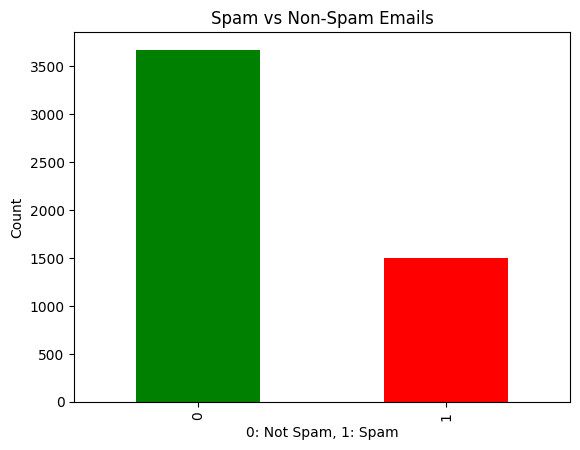

In [5]:
# Check the label distribution
print(df['Prediction'].value_counts())
df['Prediction'].value_counts().plot(kind='bar', title='Spam vs Non-Spam Emails', color=['green', 'red'])
plt.xlabel('0: Not Spam, 1: Spam')
plt.ylabel('Count')
plt.show()


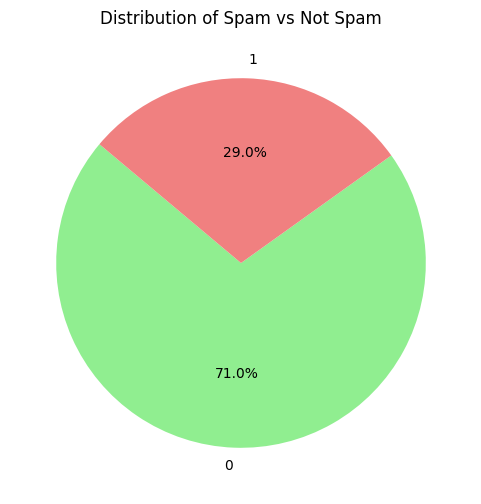

In [6]:
# Plotting the pie chart
label_counts = df['Prediction'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['lightgreen','lightcoral'], startangle=140)
plt.title('Distribution of Spam vs Not Spam')
plt.show()


## <p style="color:red;">Imbalanced dataset</p>
Non-Spam emails: 71% and Spam emails: 29%. The dataset is imbalanced.
This means that the "spam" class is overrepresented compared to the "non-spam" class. Generally, datasets where one class significantly outweighs the other (e.g., more than a 60-40 ratio) are considered unbalanced.

## <p style="color:red;">Important Considerations</p>
Since the data is already pre-processed and not in raw text format, the following steps are not required:

1. Tokenization: Not necessary, as the data is already tokenized.
2. Punctuation/Stop Words/Digit Removal: Unneeded because the data is not in raw text, and Naive Bayes does not rely on stop words.
3. Stemming/Lemmatization: Not required, as I applied lemmatization, it only improves accuracy (~0.3%) .
4. N-grams & Count Vectorizer: Unnecessary, as the data has already been processed with these techniques.

In [8]:
" If You want to apply Lemmatization to Fatures names in this dataset to reduce them to their vocabluray words, you can you use this block of code,"
"it improves 0.3% accuracy, the current model is not trained with this step"

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()  # Get first letter of POS tag
    tag_dict = {
        'J': wordnet.ADJ,  # Adjective
        'N': wordnet.NOUN, # Noun
        'V': wordnet.VERB, # Verb
        'R': wordnet.ADV   # Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if no match

# Function to lemmatize a list of words and return a dictionary
def lemmatize_words(word_list):
    lemmatized_dict = {}
    for word in word_list:
        # Determine the POS and lemmatize
        pos = get_wordnet_pos(word)
        lemmatized_word = lemmatizer.lemmatize(word, pos)
        lemmatized_dict[word] = lemmatized_word
    return lemmatized_dict

# Example usage

lemmatized_words = lemmatize_words(df.columns.to_list())


#columns_df_cleaned = [col for col in columns_df if col not in stop_words] # for removing stop words/features
df_cleaned = df.rename(columns = lemmatized_words )
X = df_cleaned.drop(columns=['Email No.','Prediction'])
y = df_cleaned['Prediction'].to_numpy()

## <p  style="color:green;" > 3. Splitting data into Train, Test data </p>

In [9]:
X = df.drop(columns=['Email No.','Prediction'])
y = df['Prediction'].to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## <p style="color:darkblue;">4. Formatting Data for NLTK Classifier.</p>
Convert the rows of the DataFrame into a list of tuples, where each tuple contains a 
feature dictionary and the corresponding label. This format is required by Naive Bayes for model fitting.

In [10]:
def format_data (features_df, labels):
    formatted_data = []
    for index in range(len(features_df)):
        feature_dict = features_df.iloc[index].to_dict()  # Convert each row into a dictionary
        label = labels[index]  # Get the label from y_train
        formatted_data.append((feature_dict, label)) 
    
    return formatted_data

train_data = format_data(X_train,y_train)

## <p style="color:darkblue;">5. Model Training.</p>

In [11]:
classifier = NaiveBayesClassifier.train(train_data)

In [12]:
test_data = format_data(X_test,y_test)

## <p style="color:darkblue;;"> 6. Model Evaluation</p>

In [13]:
def evaluate(classifier, test_data, y_test):

    """
    Evaluates the performance of a Naive Bayes classifier on the given test data.

    Parameters:
    classifier (nltk.NaiveBayesClassifier): The trained Naive Bayes classifier.
    test_data (list of tuples): A list of tuples where each tuple contains a 
                                feature dictionary (word frequencies) and its label (0 or 1).
    y_test (array-like): True labels for the test data (0 for not spam, 1 for spam).

    Prints:
    - Accuracy: The overall accuracy of the classifier on the test data.
    - Precision: The precision of the classifier (how many predicted spam instances were truly spam).
    - Recall: The recall of the classifier (how many true spam instances were correctly identified).
    - F1-Score: The F1-score, the harmonic mean of precision and recall.
    - A confusion matrix heatmap: A visual representation of true positives, false positives, 
      true negatives, and false negatives in the classifier’s predictions.

    The function uses `nltk.classify.accuracy` to compute accuracy, and metrics from `sklearn.metrics`
    to calculate precision, recall, and F1-score. It also uses `seaborn` to plot a confusion matrix.

    Example:
    >>> evaluate(classifier, test_data, y_test)
    """
    print(f"Accuracy: {(nltk.classify.accuracy(classifier, test_data)) * 100:.2f}%")
    

    predicted_labels = []
    
    for features in test_data:
        predicted_labels.append(classifier.classify(features[0]))
    
    y_preds = predicted_labels

    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
       
    
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    
    cm = confusion_matrix(y_test, y_preds)

    # Plotting confusion matrix using seaborn heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    


Accuracy: 89.28%
Precision: 0.86
Recall: 0.75
F1-Score: 0.80


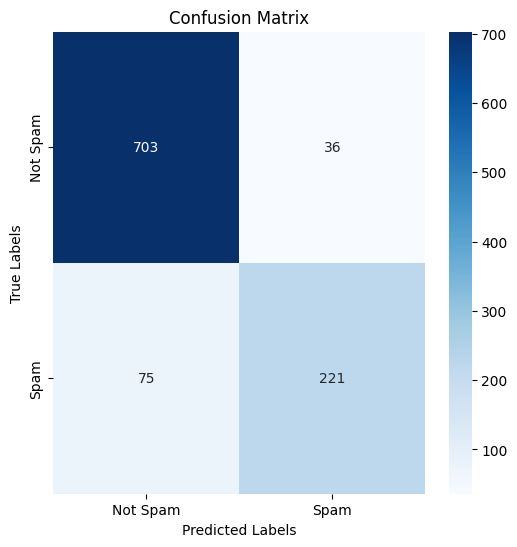

In [14]:
evaluate(classifier, test_data, y_test)

### Analysis of Metrics:
With a dataset consisting of 71% non-spam and 29% spam emails, the imbalance could influence the model's performance. The initial metrics are as follows:

- **Accuracy (89.28%)**: The high accuracy might be misleading due to the dominance of the non-spam class, as a naive model predicting all emails as non-spam would already achieve 71% accuracy.
- **Precision (0.86)**: Indicates the model is effective at avoiding false positives, correctly identifying 86% of emails it predicts as spam.
- **Recall (0.75)**: Shows that the model detects 75% of actual spam emails but misses 25%, suggesting some spam emails remain undetected.
- **F1-Score (0.80)**: Balances precision and recall, indicating overall decent performance in identifying spam emails.

